True label: 0
Predicted label: 2


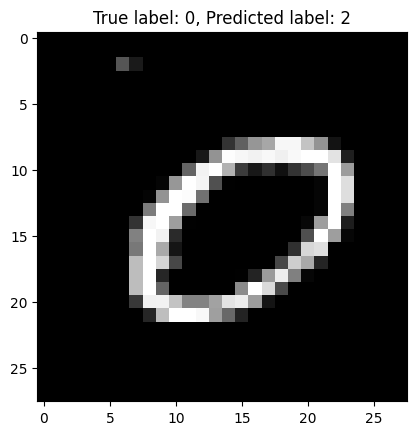

In [1]:
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Simple ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Simple Max Pooling operation (2x2 pooling)
def max_pooling(X):
    output = np.zeros((X.shape[0] // 2, X.shape[1] // 2))
    for i in range(0, X.shape[0], 2):
        for j in range(0, X.shape[1], 2):
            output[i // 2, j // 2] = np.max(X[i:i+2, j:j+2])
    return output

# A simple convolution function with a kernel
def convolve(X, kernel):
    return correlate2d(X, kernel, mode='valid')

# A simple softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Simple CNN Model
class SimpleCNN:
    def __init__(self):
        # Randomly initialize convolution kernel (filter) and weights for final layer
        self.conv_kernel = np.random.randn(3, 3)
        self.fc_weights = np.random.randn(13 * 13, 10)  # Fully connected layer
    
    def forward(self, X):
        # Step 1: Convolution
        conv_out = convolve(X, self.conv_kernel)
        
        # Step 2: ReLU activation
        relu_out = relu(conv_out)
        
        # Step 3: Max Pooling
        pooled_out = max_pooling(relu_out)
        
        # Step 4: Flatten for fully connected layer
        flattened = pooled_out.flatten()
        
        # Step 5: Fully connected layer (logits)
        logits = np.dot(flattened, self.fc_weights)
        
        # Step 6: Softmax to get probabilities
        probabilities = softmax(logits)
        
        return probabilities

# Load MNIST dataset (for simplicity, only using 1000 samples)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data'].reshape(-1, 28, 28) / 255.0  # Normalize images
y = mnist['target'].astype(int)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple CNN (Note: This example does not include backpropagation)
cnn = SimpleCNN()

# Test on one image from the test set
#image = X_test[0]
#label = y_test[0]

# Randomly select an image from the test set
random_index = np.random.randint(0, len(X_test))
image = X_test[random_index]
label = y_test[random_index]

# Perform a forward pass
output = cnn.forward(image)

# Get predicted label (index of the highest probability)
predicted_label = np.argmax(output)

print(f"True label: {label}")
print(f"Predicted label: {predicted_label}")

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"True label: {label}, Predicted label: {predicted_label}")
plt.show()


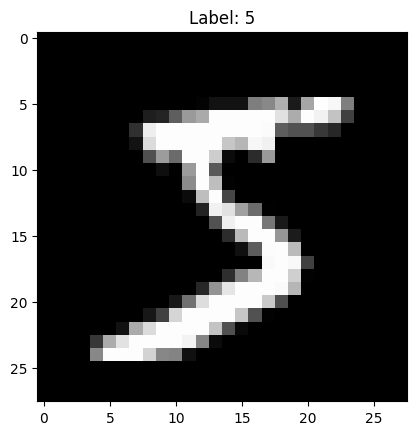

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

# Fetch MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Set as_frame=False to return data as arrays

# X contains the images, y contains the labels
X, y = mnist['data'], mnist['target']

# Convert labels to integers if necessary (they may be loaded as strings)
y = y.astype(np.int8)

# Reshape the first image to 28x28
image = X[0].reshape(28, 28)

# Visualize the image
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.title(f'Label: {y[0]}')
plt.show()


True label: 8
Predicted label: 7


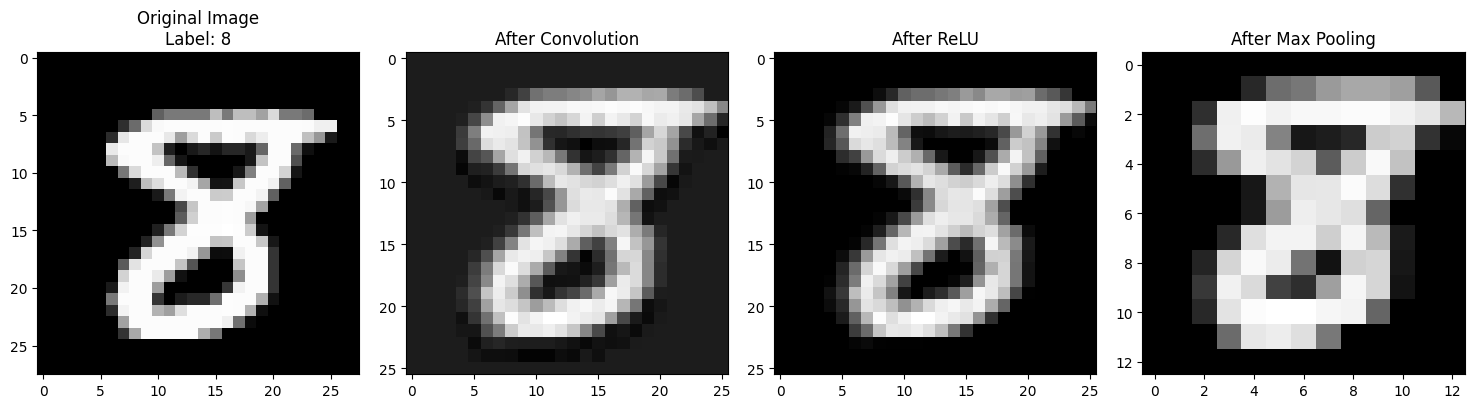

In [3]:
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Simple ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Simple Max Pooling operation (2x2 pooling)
def max_pooling(X):
    output = np.zeros((X.shape[0] // 2, X.shape[1] // 2))
    for i in range(0, X.shape[0], 2):
        for j in range(0, X.shape[1], 2):
            output[i // 2, j // 2] = np.max(X[i:i+2, j:j+2])
    return output

# A simple convolution function with a kernel
def convolve(X, kernel):
    return correlate2d(X, kernel, mode='valid')

# A simple softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Simple CNN Model
class SimpleCNN:
    def __init__(self):
        # Randomly initialize convolution kernel (filter) and weights for final layer
        self.conv_kernel = np.random.randn(3, 3)
        self.fc_weights = np.random.randn(13 * 13, 10)  # Fully connected layer
    
    def forward(self, X):
        # Step 1: Convolution
        conv_out = convolve(X, self.conv_kernel)
        
        # Step 2: ReLU activation
        relu_out = relu(conv_out)
        
        # Step 3: Max Pooling
        pooled_out = max_pooling(relu_out)
        
        # Step 4: Flatten for fully connected layer
        flattened = pooled_out.flatten()
        
        # Step 5: Fully connected layer (logits)
        logits = np.dot(flattened, self.fc_weights)
        
        # Step 6: Softmax to get probabilities
        probabilities = softmax(logits)
        
        return conv_out, relu_out, pooled_out, probabilities

# Load MNIST dataset (for simplicity, only using 1000 samples)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data'].reshape(-1, 28, 28) / 255.0  # Normalize images
y = mnist['target'].astype(int)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple CNN (Note: This example does not include backpropagation)
cnn = SimpleCNN()

# Test on one image from the test set
image = X_test[0]
label = y_test[0]

# Perform a forward pass to get outputs at each layer
conv_out, relu_out, pooled_out, output = cnn.forward(image)

# Get predicted label (index of the highest probability)
predicted_label = np.argmax(output)

print(f"True label: {label}")
print(f"Predicted label: {predicted_label}")

# Visualization
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title(f"Original Image\nLabel: {label}")

# Plot after convolution
axs[1].imshow(conv_out, cmap='gray')
axs[1].set_title("After Convolution")

# Plot after ReLU
axs[2].imshow(relu_out, cmap='gray')
axs[2].set_title("After ReLU")

# Plot after Max Pooling
axs[3].imshow(pooled_out, cmap='gray')
axs[3].set_title("After Max Pooling")

# Show the plots
plt.tight_layout()
plt.show()


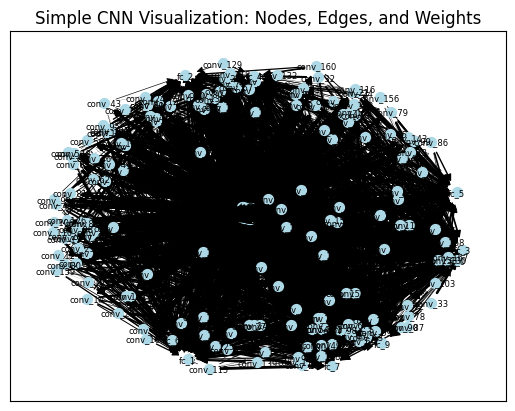

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Simple ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Simple Max Pooling operation (2x2 pooling)
def max_pooling(X):
    output = np.zeros((X.shape[0] // 2, X.shape[1] // 2))
    for i in range(0, X.shape[0], 2):
        for j in range(0, X.shape[1], 2):
            output[i // 2, j // 2] = np.max(X[i:i+2, j:j+2])
    return output

# A simple convolution function with a kernel
def convolve(X, kernel):
    return correlate2d(X, kernel, mode='valid')

# A simple softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Simple CNN Model
class SimpleCNN:
    def __init__(self):
        # Randomly initialize convolution kernel (filter) and weights for final layer
        self.conv_kernel = np.random.randn(3, 3)
        self.fc_weights = np.random.randn(13 * 13, 10)  # Fully connected layer
    
    def forward(self, X):
        # Step 1: Convolution
        conv_out = convolve(X, self.conv_kernel)
        
        # Step 2: ReLU activation
        relu_out = relu(conv_out)
        
        # Step 3: Max Pooling
        pooled_out = max_pooling(relu_out)
        
        # Step 4: Flatten for fully connected layer
        flattened = pooled_out.flatten()
        
        # Step 5: Fully connected layer (logits)
        logits = np.dot(flattened, self.fc_weights)
        
        # Step 6: Softmax to get probabilities
        probabilities = softmax(logits)
        
        return conv_out, relu_out, pooled_out, probabilities

# Visualization of nodes, edges, and weights
def draw_network(cnn, image):
    G = nx.DiGraph()

    # Add input layer (flattened 28x28 pixels)
    input_layer = [f"input_{i}" for i in range(28 * 28)]
    G.add_nodes_from(input_layer)

    # Add convolutional layer
    conv_layer = [f"conv_{i}" for i in range(13 * 13)]
    G.add_nodes_from(conv_layer)

    # Add fully connected layer (10 output neurons)
    fc_layer = [f"fc_{i}" for i in range(10)]
    G.add_nodes_from(fc_layer)

    # Add edges from input to convolutional layer
    for i in range(len(input_layer)):
        for j in range(len(conv_layer)):
            weight = np.random.uniform(0.1, 0.5)  # Random weight for visualization
            G.add_edge(input_layer[i], conv_layer[j], weight=weight)

    # Add edges from convolutional to fully connected layer
    for i in range(len(conv_layer)):
        for j in range(len(fc_layer)):
            weight = cnn.fc_weights[i % cnn.fc_weights.shape[0], j]
            G.add_edge(conv_layer[i], fc_layer[j], weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G, seed=42)  # Layout for the nodes

    # Extract weights to use them for edge thickness
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    
    # Normalize weights for better visualization
    weights = [w / max(weights) * 3 for w in weights]

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=50)

    # Draw edges with varying thickness based on weights
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=6)

    plt.title("Simple CNN Visualization: Nodes, Edges, and Weights")
    plt.show()


# Load MNIST dataset (for simplicity, only using 1000 samples)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data'].reshape(-1, 28, 28) / 255.0  # Normalize images
y = mnist['target'].astype(int)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple CNN (Note: This example does not include backpropagation)
cnn = SimpleCNN()

# Test on one image from the test set
image = X_test[0]

# Visualize the CNN
draw_network(cnn, image)
